<a href="https://colab.research.google.com/github/Suryaprasadindra/Apache-spark/blob/main/Project_bigMartSales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [322]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [323]:
df = pd.read_csv('/content/Project_sales_prediction.csv')

In [324]:
df.head(5)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [325]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [326]:
df.shape

(8523, 12)

In [327]:
# check unique values of each columns

for column in df.columns:
  print(f"Unique values in column '{column}':")
  print(df[column].unique())
  print("\n")


Unique values in column 'Item_Identifier':
['FDA15' 'DRC01' 'FDN15' ... 'NCF55' 'NCW30' 'NCW05']


Unique values in column 'Item_Weight':
[ 9.3    5.92  17.5   19.2    8.93  10.395 13.65     nan 16.2   11.8
 18.5   15.1   17.6   16.35   9.    13.35  18.85  14.6   13.85  13.
  7.645 11.65   5.925 19.25  18.6   18.7   17.85  10.     8.85   9.8
 13.6   21.35  12.15   6.42  19.6   15.85   7.39  10.195  9.895 10.895
  7.905  9.195  8.365  7.97  17.7   19.35   8.645 15.6   18.25   7.855
  7.825  8.39  12.85  19.     5.905  7.76  16.75  15.5    6.055  6.305
 20.85  20.75   8.895 19.7    8.75  13.3    8.31  19.75  17.1   10.5
  6.635 14.15   8.89   9.1    7.5   16.85   7.485 11.6   12.65  20.25
  8.6   12.6    8.88  20.5   13.5    7.235  6.92   8.02  12.8   16.6
 14.    16.    21.25   7.365 18.35   5.465  7.27   6.155 19.5   15.2
 14.5   13.1   12.3   11.1   11.3    5.75  11.35   6.525 10.3    5.78
 11.85  18.75   5.26  16.1    9.5   13.8   14.65   6.67   6.11  17.2
  6.32   4.88   5.425 14.1 

In [328]:
# number of unique values per each column

for column in df.columns:
  print(f"Unique values in column '{column}': {len(df[column].unique())}")


Unique values in column 'Item_Identifier': 1559
Unique values in column 'Item_Weight': 416
Unique values in column 'Item_Fat_Content': 5
Unique values in column 'Item_Visibility': 7880
Unique values in column 'Item_Type': 16
Unique values in column 'Item_MRP': 5938
Unique values in column 'Outlet_Identifier': 10
Unique values in column 'Outlet_Establishment_Year': 9
Unique values in column 'Outlet_Size': 4
Unique values in column 'Outlet_Location_Type': 3
Unique values in column 'Outlet_Type': 4
Unique values in column 'Item_Outlet_Sales': 3493


# Combing same categories into one category


In [329]:
#  Item_Fat_Content: ['Low Fat' 'Regular' 'low fat' 'LF' 'reg'] in this column 'Low Fat', 'low fat', 'LF' are one category only so replace names of  'low fat' and 'LF' with  'Low Fat'.

df['Item_Fat_Content'] = df['Item_Fat_Content'].replace(['low fat', 'LF'], 'Low Fat')
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace(['reg'], 'Regular')
df['Item_Fat_Content'].unique()


array(['Low Fat', 'Regular'], dtype=object)

# Creating new variable Outletage

In [330]:
# Unique values in column Outlet_Establishment_Year: [1999 2009 1998 1987 1985 2002 2007 1997 2004] from this column create a new column with the name of 'outlet age' from current year - establishment year and delete old variable Outlet_Establishment_Year in df, include new variable outlet age in df,

import datetime

# Get the current year
current_year = datetime.datetime.now().year

# Create a new column for outlet age
df['Outlet_Age'] = current_year - df['Outlet_Establishment_Year']

# Drop the old column
df.drop('Outlet_Establishment_Year', axis=1, inplace=True)


In [331]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Age
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,Medium,Tier 1,Supermarket Type1,3735.1380,25
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,Medium,Tier 3,Supermarket Type2,443.4228,15
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,Medium,Tier 1,Supermarket Type1,2097.2700,25
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,NaN,Tier 3,Grocery Store,732.3800,26
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,High,Tier 3,Supermarket Type1,994.7052,37


remove duplicate rows if available in dataset

In [332]:
# remove duplicate rows from df if any

df = df.drop_duplicates()


In [333]:
# prompt: check data frame rows and columns

print("Number of rows:", df.shape[0])
print("Number of columns:", df.shape[1])


Number of rows: 8523
Number of columns: 12


Missing values imputation

In [334]:
#check missing values

print("Number of missing values in each column:")
print(df.isnull().sum())


Number of missing values in each column:
Item_Identifier            0
Item_Weight             1463
Item_Fat_Content           0
Item_Visibility            0
Item_Type                  0
Item_MRP                   0
Outlet_Identifier          0
Outlet_Size             2410
Outlet_Location_Type       0
Outlet_Type                0
Item_Outlet_Sales          0
Outlet_Age                 0
dtype: int64


In [335]:
# Group the data by 'Item_Identifier' and calculate the mode of 'Item_Weight' for each group
mode_weights = df.groupby('Item_Identifier')['Item_Weight'].agg(pd.Series.mode)

# Fill in the missing values in 'Item_Weight' with the corresponding mode value
df['Item_Weight'].fillna(df['Item_Identifier'].map(mode_weights), inplace=True)


In [336]:
#check missing values again

print("Number of missing values in each column:")
print(df.isnull().sum())

Number of missing values in each column:
Item_Identifier            0
Item_Weight                0
Item_Fat_Content           0
Item_Visibility            0
Item_Type                  0
Item_MRP                   0
Outlet_Identifier          0
Outlet_Size             2410
Outlet_Location_Type       0
Outlet_Type                0
Item_Outlet_Sales          0
Outlet_Age                 0
dtype: int64


In [337]:
df['Outlet_Size'].value_counts()


Outlet_Size
Medium    2793
Small     2388
High       932
Name: count, dtype: int64

In [338]:
df['Outlet_Type'].value_counts()


Outlet_Type
Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: count, dtype: int64

In [339]:
mode_outlet = df.pivot_table(values='Outlet_Size',columns='Outlet_Type',aggfunc=(lambda x:x.mode()[0]))

In [340]:
mode_outlet

Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Outlet_Size,Small,Small,Medium,Medium


In [341]:
missing_values = df['Outlet_Size'].isnull()

In [342]:
missing_values

0       False
1       False
2       False
3        True
4       False
        ...  
8518    False
8519     True
8520    False
8521    False
8522    False
Name: Outlet_Size, Length: 8523, dtype: bool

In [343]:
df.loc[missing_values,'Outlet_Size'] = df.loc[missing_values,'Outlet_Type'].apply(lambda x :mode_outlet[x])

In [344]:
df.isnull().sum()

Item_Identifier         0
Item_Weight             0
Item_Fat_Content        0
Item_Visibility         0
Item_Type               0
Item_MRP                0
Outlet_Identifier       0
Outlet_Size             0
Outlet_Location_Type    0
Outlet_Type             0
Item_Outlet_Sales       0
Outlet_Age              0
dtype: int64

In [345]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Age
0,FDA15,9.3,Low Fat,0.016047,Dairy,249.8092,OUT049,Medium,Tier 1,Supermarket Type1,3735.1380,25
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,Medium,Tier 3,Supermarket Type2,443.4228,15
2,FDN15,17.5,Low Fat,0.016760,Meat,141.6180,OUT049,Medium,Tier 1,Supermarket Type1,2097.2700,25
3,FDX07,19.2,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,Small,Tier 3,Grocery Store,732.3800,26
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,High,Tier 3,Supermarket Type1,994.7052,37


drop item identifier column

In [346]:
# remove item identifier column

df = df.drop('Item_Identifier', axis=1)


In [347]:
df.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Age
0,9.3,Low Fat,0.016047,Dairy,249.8092,OUT049,Medium,Tier 1,Supermarket Type1,3735.1380,25
1,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,Medium,Tier 3,Supermarket Type2,443.4228,15
2,17.5,Low Fat,0.016760,Meat,141.6180,OUT049,Medium,Tier 1,Supermarket Type1,2097.2700,25
3,19.2,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,Small,Tier 3,Grocery Store,732.3800,26
4,8.93,Low Fat,0.000000,Household,53.8614,OUT013,High,Tier 3,Supermarket Type1,994.7052,37


visulizations

# Handling Categorical variables

one hot encoding

In [348]:
# List of columns to apply one-hot encoding
one_hot_columns = ['Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Location_Type', 'Outlet_Type']

# Apply one-hot encoding to these columns
one_hot_encoded_df = pd.get_dummies(df[one_hot_columns])

# Drop the original columns from df and join the one-hot encoded columns
df = df.drop(columns=one_hot_columns).join(one_hot_encoded_df)


In [349]:
df.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Size,Item_Outlet_Sales,Outlet_Age,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Type_Baking Goods,Item_Type_Breads,...,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,9.3,0.016047,249.8092,Medium,3735.1380,25,True,False,False,False,...,False,False,True,True,False,False,False,True,False,False
1,5.92,0.019278,48.2692,Medium,443.4228,15,False,True,False,False,...,False,False,False,False,False,True,False,False,True,False
2,17.5,0.016760,141.6180,Medium,2097.2700,25,True,False,False,False,...,False,False,True,True,False,False,False,True,False,False
3,19.2,0.000000,182.0950,Small,732.3800,26,False,True,False,False,...,False,False,False,False,False,True,True,False,False,False
4,8.93,0.000000,53.8614,High,994.7052,37,True,False,False,False,...,False,False,False,False,False,True,False,True,False,False


# label encoding

In [350]:
# prompt: apply label encoder for outletsize and outlet age

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

# Apply label encoding to the 'Outlet_Size' column
df['Outlet_Size'] = le.fit_transform(df['Outlet_Size'])

# Apply label encoding to the 'Outlet_Age' column
df['Outlet_Age'] = le.fit_transform(df['Outlet_Age'])

df.head()


,Item_Weight,Item_Visibility,Item_MRP,Outlet_Size,Item_Outlet_Sales,Outlet_Age,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Type_Baking Goods,Item_Type_Breads,...,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,9.3,0.016047,249.8092,1,3735.1380,4,True,False,False,False,...,False,False,True,True,False,False,False,True,False,False
1,5.92,0.019278,48.2692,1,443.4228,0,False,True,False,False,...,False,False,False,False,False,True,False,False,True,False
2,17.5,0.016760,141.6180,1,2097.2700,4,True,False,False,False,...,False,False,True,True,False,False,False,True,False,False
3,19.2,0.000000,182.0950,2,732.3800,5,False,True,False,False,...,False,False,False,False,False,True,True,False,False,False
4,8.93,0.000000,53.8614,0,994.7052,7,True,False,False,False,...,False,False,False,False,False,True,False,True,False,False


**Detect and remove outliers**

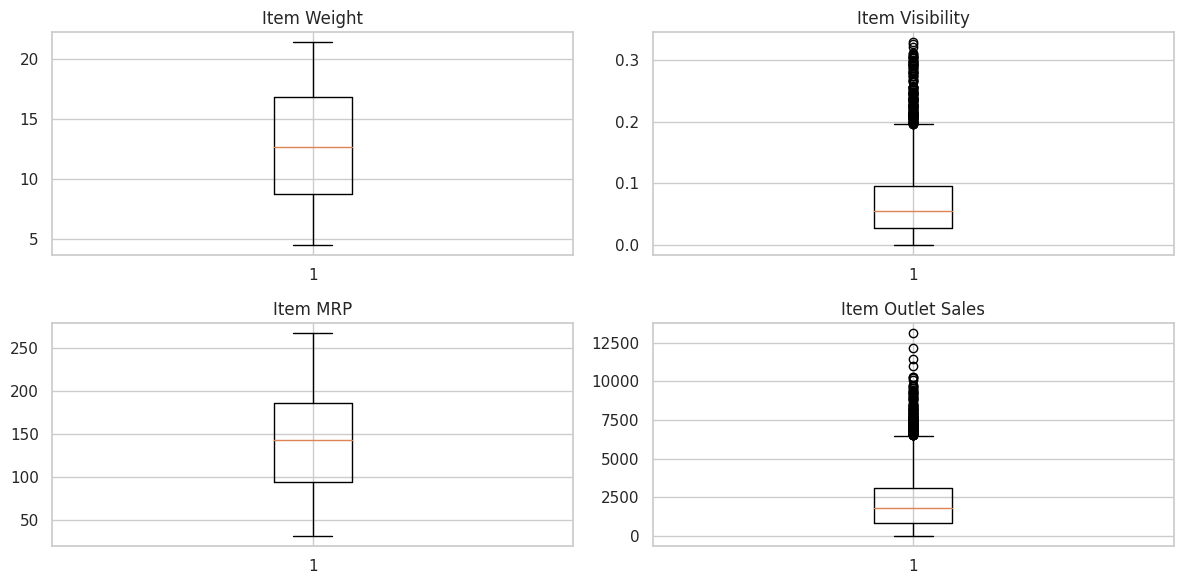

In [351]:
# create box plots for Item_Weight, Item_Visibility, Item_MRP, Item_Outlet_Sales

import matplotlib.pyplot as plt

# Create a figure and axes
fig, axs = plt.subplots(2, 2, figsize=(12, 6))

# Plot the box plot for Item_Weight
axs[0, 0].boxplot(df['Item_Weight'])
axs[0, 0].set_title('Item Weight')

# Plot the box plot for Item_Visibility
axs[0, 1].boxplot(df['Item_Visibility'])
axs[0, 1].set_title('Item Visibility')

# Plot the box plot for Item_MRP
axs[1, 0].boxplot(df['Item_MRP'])
axs[1, 0].set_title('Item MRP')

# Plot the box plot for Item_Outlet_Sales
axs[1, 1].boxplot(df['Item_Outlet_Sales'])
axs[1, 1].set_title('Item Outlet Sales')

# Adjust the layout and show the plot
plt.tight_layout()
plt.show()


In [352]:
#  remove outliers in item visibility

# Calculate the lower and upper bounds for outliers
lower_bound = df['Item_Visibility'].quantile(0.05)
upper_bound = df['Item_Visibility'].quantile(0.95)

# Filter the DataFrame to remove outliers
df = df[(df['Item_Visibility'] >= lower_bound) & (df['Item_Visibility'] <= upper_bound)]

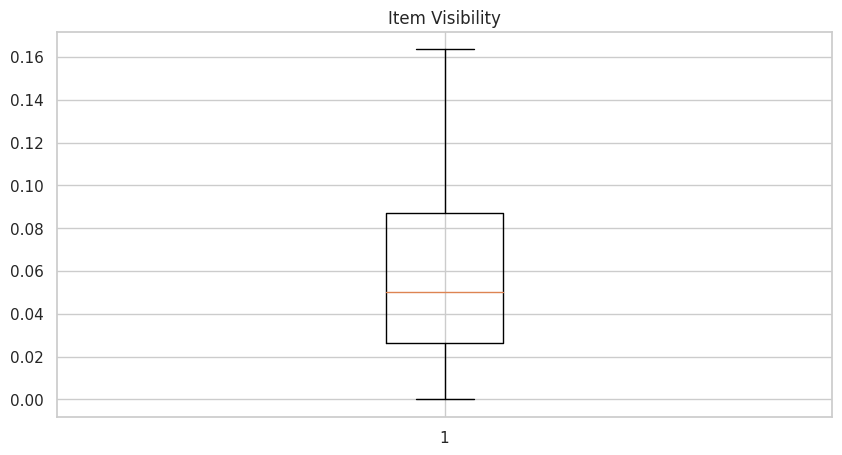

In [353]:
# boxplot for Item_Visibility

import matplotlib.pyplot as plt
# Create a figure and axes
fig, ax = plt.subplots(figsize=(10, 5))

# Create a box plot for 'Item_Visibility'
ax.boxplot(df['Item_Visibility'])
ax.set_title('Item Visibility')

# Show the plot
plt.show()


In [354]:
#remove outliers in Item_Outlet_Sales

# Calculate the lower and upper bounds for outliers
lower_bound = df['Item_Outlet_Sales'].quantile(0.05)
upper_bound = df['Item_Outlet_Sales'].quantile(0.95)

# Filter the DataFrame to remove outliers
df = df[(df['Item_Outlet_Sales'] >= lower_bound) & (df['Item_Outlet_Sales'] <= upper_bound)]


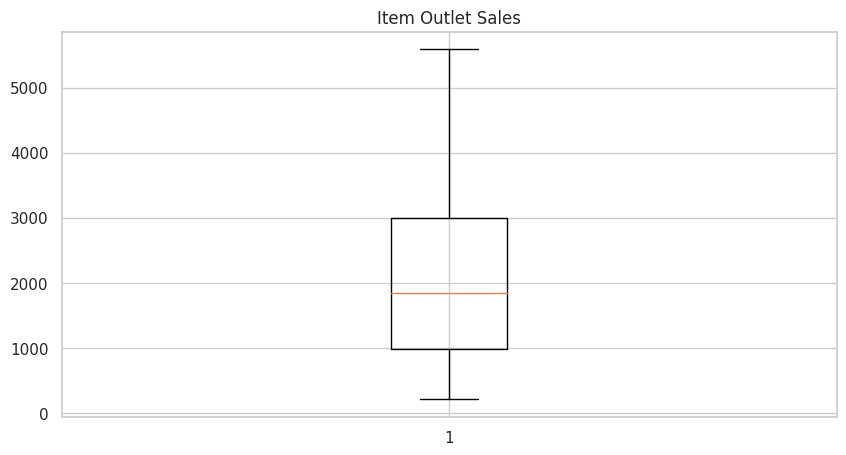

In [355]:
# boxplot for Item_Outlet_Sales

import matplotlib.pyplot as plt
# Create a figure and axes
fig, ax = plt.subplots(figsize=(10, 5))

# Create a box plot for 'Item_Outlet_Sales'
ax.boxplot(df['Item_Outlet_Sales'])
ax.set_title('Item Outlet Sales')

# Show the plot
plt.show()


In [356]:
df.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Size,Item_Outlet_Sales,Outlet_Age,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Type_Baking Goods,Item_Type_Breads,...,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,9.3,0.016047,249.8092,1,3735.1380,4,True,False,False,False,...,False,False,True,True,False,False,False,True,False,False
1,5.92,0.019278,48.2692,1,443.4228,0,False,True,False,False,...,False,False,False,False,False,True,False,False,True,False
2,17.5,0.016760,141.6180,1,2097.2700,4,True,False,False,False,...,False,False,True,True,False,False,False,True,False,False
3,19.2,0.000000,182.0950,2,732.3800,5,False,True,False,False,...,False,False,False,False,False,True,True,False,False,False
4,8.93,0.000000,53.8614,0,994.7052,7,True,False,False,False,...,False,False,False,False,False,True,False,True,False,False


In [357]:
print(df.dtypes)


Item_Weight                         object
Item_Visibility                    float64
Item_MRP                           float64
Outlet_Size                          int64
Item_Outlet_Sales                  float64
Outlet_Age                           int64
Item_Fat_Content_Low Fat              bool
Item_Fat_Content_Regular              bool
Item_Type_Baking Goods                bool
Item_Type_Breads                      bool
Item_Type_Breakfast                   bool
Item_Type_Canned                      bool
Item_Type_Dairy                       bool
Item_Type_Frozen Foods                bool
Item_Type_Fruits and Vegetables       bool
Item_Type_Hard Drinks                 bool
Item_Type_Health and Hygiene          bool
Item_Type_Household                   bool
Item_Type_Meat                        bool
Item_Type_Others                      bool
Item_Type_Seafood                     bool
Item_Type_Snack Foods                 bool
Item_Type_Soft Drinks                 bool
Item_Type_S

In [358]:
print(df.isnull().sum())

Item_Weight                        0
Item_Visibility                    0
Item_MRP                           0
Outlet_Size                        0
Item_Outlet_Sales                  0
Outlet_Age                         0
Item_Fat_Content_Low Fat           0
Item_Fat_Content_Regular           0
Item_Type_Baking Goods             0
Item_Type_Breads                   0
Item_Type_Breakfast                0
Item_Type_Canned                   0
Item_Type_Dairy                    0
Item_Type_Frozen Foods             0
Item_Type_Fruits and Vegetables    0
Item_Type_Hard Drinks              0
Item_Type_Health and Hygiene       0
Item_Type_Household                0
Item_Type_Meat                     0
Item_Type_Others                   0
Item_Type_Seafood                  0
Item_Type_Snack Foods              0
Item_Type_Soft Drinks              0
Item_Type_Starchy Foods            0
Outlet_Identifier_OUT010           0
Outlet_Identifier_OUT013           0
Outlet_Identifier_OUT017           0
O

In [359]:
df['Item_Weight'] = pd.to_numeric(df['Item_Weight'], errors='coerce')

In [360]:
df['Item_Weight'].dtype

dtype('float64')

In [361]:
# Remove rows with NaN values in the 'Item_Weight' column
df.dropna(subset=['Item_Weight'], inplace=True)

# Reset the index after removing rows
df.reset_index(drop=True, inplace=True)


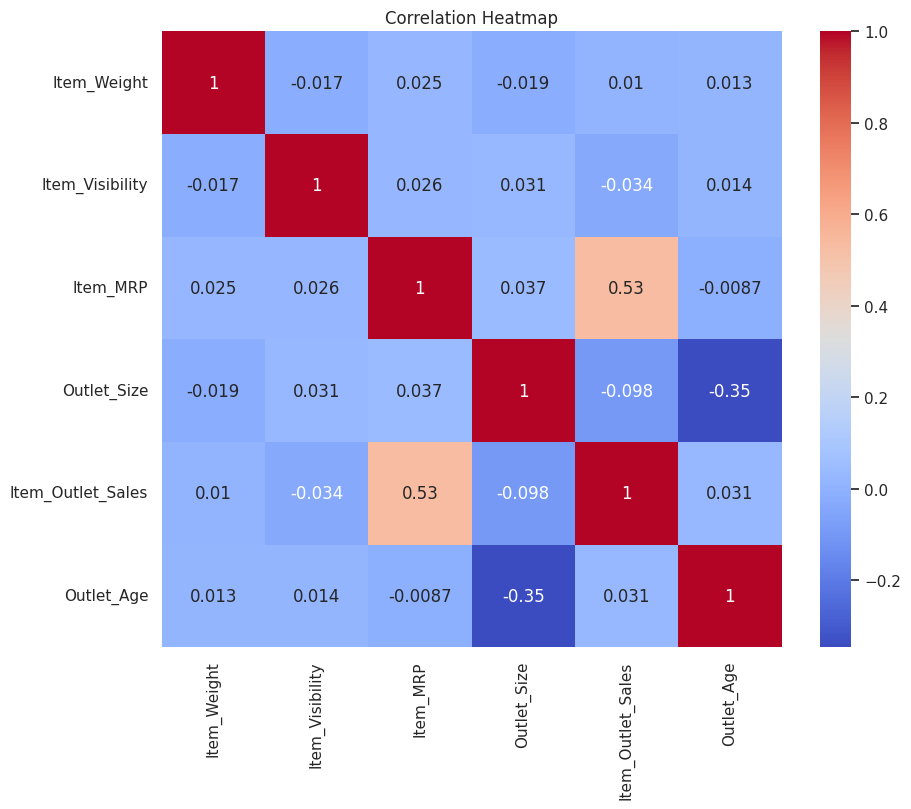

In [362]:
# prompt: create heatmap for Item_Weight	Item_Visibility	Item_MRP	Outlet_Size	Item_Outlet_Sales	Outlet_Age

import matplotlib.pyplot as plt
import seaborn as sns

# Create a correlation matrix
corr_matrix = df[['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Outlet_Size', 'Item_Outlet_Sales', 'Outlet_Age']].corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


In [363]:
# Move the 'Item_Outlet_Sales' column to the last position in the DataFrame
cols = list(df.columns)
cols.pop(cols.index('Item_Outlet_Sales'))
cols.append('Item_Outlet_Sales')
df = df[cols]


In [364]:
df.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Size,Outlet_Age,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,...,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Item_Outlet_Sales
0,9.30,0.016047,249.8092,1,4,True,False,False,False,False,...,False,True,True,False,False,False,True,False,False,3735.1380
1,5.92,0.019278,48.2692,1,0,False,True,False,False,False,...,False,False,False,False,True,False,False,True,False,443.4228
2,17.50,0.016760,141.6180,1,4,True,False,False,False,False,...,False,True,True,False,False,False,True,False,False,2097.2700
3,19.20,0.000000,182.0950,2,5,False,True,False,False,False,...,False,False,False,False,True,True,False,False,False,732.3800
4,8.93,0.000000,53.8614,0,7,True,False,False,False,False,...,False,False,False,False,True,False,True,False,False,994.7052


In [365]:
# Convert all columns with boolean data types to int (1s and 0s)
for col in df.columns:
    if df[col].dtype == 'bool':
        df[col] = df[col].astype(int)


In [366]:
df.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Size,Outlet_Age,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,...,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Item_Outlet_Sales
0,9.30,0.016047,249.8092,1,4,1,0,0,0,0,...,0,1,1,0,0,0,1,0,0,3735.1380
1,5.92,0.019278,48.2692,1,0,0,1,0,0,0,...,0,0,0,0,1,0,0,1,0,443.4228
2,17.50,0.016760,141.6180,1,4,1,0,0,0,0,...,0,1,1,0,0,0,1,0,0,2097.2700
3,19.20,0.000000,182.0950,2,5,0,1,0,0,0,...,0,0,0,0,1,1,0,0,0,732.3800
4,8.93,0.000000,53.8614,0,7,1,0,0,0,0,...,0,0,0,0,1,0,1,0,0,994.7052


In [367]:
from sklearn.preprocessing import StandardScaler

# Assuming df is your DataFrame

# Create an instance of StandardScaler
scaler = StandardScaler()

# List of numeric columns to standardize
numeric_columns = ['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Outlet_Age']

# Apply StandardScaler to these columns
df[numeric_columns] = scaler.fit_transform(df[numeric_columns])

# Display the first few rows to verify the standardization
df.head()


,Item_Weight,Item_Visibility,Item_MRP,Outlet_Size,Outlet_Age,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,...,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Item_Outlet_Sales
0,-0.761566,-1.027880,1.822272,1,0.003306,1,0,0,0,0,...,0,1,1,0,0,0,1,0,0,3735.1380
1,-1.487176,-0.949937,-1.506592,1,-1.478352,0,1,0,0,0,...,0,0,0,0,1,0,0,1,0,443.4228
2,0.998789,-1.010685,0.035263,1,0.003306,1,0,0,0,0,...,0,1,1,0,0,0,1,0,0,2097.2700
3,1.363741,-1.415008,0.703828,2,0.373720,0,1,0,0,0,...,0,0,0,0,1,1,0,0,0,732.3800
4,-0.840997,-1.415008,-1.414225,0,1.114549,1,0,0,0,0,...,0,0,0,0,1,0,1,0,0,994.7052


In [368]:
# download df into csv file
df.to_csv('preprocessed_data.csv', index=False)

In [370]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Assuming df is your DataFrame
# Splitting the DataFrame into training and test sets
train_df, test_df = train_test_split(df, test_size=0.30, random_state=42)  # 30% for testing, 70% for training

# Display the first few rows of the training and test sets to verify
print("Training DataFrame:")
print(train_df.shape)
print("\nTest DataFrame:")
print(test_df.shape)


Training DataFrame:
(5098, 41)

Test DataFrame:
(2185, 41)


In [371]:
# download df into csv file
train_df.to_csv('train_preprocessed_data.csv', index=False)
test_df.to_csv('test_preprocessed_data.csv', index=False)

# New Section

In [9]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import StandardScaler
from math import sqrt


In [10]:
# Load your data
train_df = pd.read_csv('/content/train_preprocessed_data.csv')
test_df = pd.read_csv('/content/test_preprocessed_data.csv')

# Assuming the last column is the target variable
X_train = train_df.iloc[:, :-1]
y_train = train_df.iloc[:, -1]
X_test = test_df.iloc[:, :-1]
y_test = test_df.iloc[:, -1]


In [11]:
import numpy as np
import pandas as pd
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.metrics import mean_squared_error, r2_score
from xgboost import XGBRegressor
from math import sqrt



# Define the model
xgb_model = XGBRegressor()

# Set up parameters for tuning
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.05, 0.1]
}

# Setup the GridSearchCV
kf = KFold(n_splits=5, shuffle=True, random_state=42)
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=kf, scoring='r2', verbose=1)

# Perform the grid search
grid_search.fit(X_train, y_train)

# Best estimator
best_xgb_model = grid_search.best_estimator_

# Predictions
train_predictions = best_xgb_model.predict(X_train)
test_predictions = best_xgb_model.predict(X_test)

# Calculate metrics
mse_train = mean_squared_error(y_train, train_predictions)
rmse_train = sqrt(mse_train)
training_accuracy = r2_score(y_train, train_predictions)

mse_test = mean_squared_error(y_test, test_predictions)
rmse_test = sqrt(mse_test)
test_accuracy = r2_score(y_test, test_predictions)

# Print best parameters and results
print("Best Parameters:", grid_search.best_params_)
print("Training MSE:", mse_train)
print("Training RMSE:", rmse_train)
print("Training Accuracy:", training_accuracy)
print("Validation Accuracy (Best R^2 from Grid Search):", grid_search.best_score_)
print("\nTest MSE:", mse_test)
print("Test RMSE:", rmse_test)
print("Test Accuracy:", test_accuracy)


Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best Parameters: {'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 100}
Training MSE: 813114.6075753454
Training RMSE: 901.7286773610704
Training Accuracy: 0.5386630845545037
Validation Accuracy (Best R^2 from Grid Search): 0.5147014212279728

Test MSE: 836952.7431442789
Test RMSE: 914.8512136649756
Test Accuracy: 0.5331571518355734


random forest

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt



# Define the model
rf_model = RandomForestRegressor()

# Set up parameters for tuning
param_grid = {
    'n_estimators': [100, 200, 300],  # Number of trees in the forest
    'max_depth': [None, 10, 20, 30],  # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4]     # Minimum number of samples required at each leaf node
}

# Setup the GridSearchCV
kf = KFold(n_splits=5, shuffle=True, random_state=42)
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=kf, scoring='r2', verbose=1)

# Perform the grid search
grid_search.fit(X_train, y_train)

# Best estimator
best_rf_model = grid_search.best_estimator_

# Predictions
train_predictions = best_rf_model.predict(X_train)
test_predictions = best_rf_model.predict(X_test)

# Calculate metrics
mse_train = mean_squared_error(y_train, train_predictions)
rmse_train = sqrt(mse_train)
training_accuracy = r2_score(y_train, train_predictions)

mse_test = mean_squared_error(y_test, test_predictions)
rmse_test = sqrt(mse_test)
test_accuracy = r2_score(y_test, test_predictions)

# Print best parameters and results
print("Best Parameters:", grid_search.best_params_)
print("Training MSE:", mse_train)
print("Training RMSE:", rmse_train)
print("Training Accuracy:", training_accuracy)
print("Validation Accuracy (Best R^2 from Grid Search):", grid_search.best_score_)
print("\nTest MSE:", mse_test)
print("Test RMSE:", rmse_test)
print("Test Accuracy:", test_accuracy)


Fitting 5 folds for each of 108 candidates, totalling 540 fits
